In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, ticker
%matplotlib inline

In [2]:
def p(x,mu,sigma):
    return sp.multivariate_normal.pdf(x, mean=mu, cov=sigma)

def g(c, s, x):
    r = np.array([[c, s], [-s, c]])
    return np.matmul(x, r)

mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])

def h(c, s, x):
    r = np.array([[c, s], [-s, c]])
    p0 = p(x, mu, sigma)
    p1 = p(x, np.matmul(mu, r), np.matmul(np.transpose(r), np.matmul(sigma, r)))
    return p0/(p0 + p1)
    #return p(x,0.5,1)/(p(x,0.5,1) + abs(c)*p(a+c*x,0.5,1))

In [4]:
N = 10**4
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
C = 0
S = 0
range = 3
clow = C-range
chigh = C+range
step = 100
slow = S - range
shigh = S + range
alpha = 0
e = 10**-7

mylosses= np.zeros((step, step))
i = 0
for s in np.linspace(slow,shigh,step):
    losses = np.zeros(step)
    j = 0
    for c in np.linspace(clow, chigh, step):
        yy = g(c, s, xx)
        losses[j] = np.mean(-np.log(e+h(c,s, xx)) - np.log(e+1.-h(c, s, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

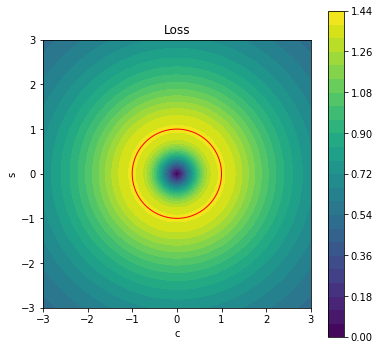

In [10]:
x = np.linspace(clow, chigh, step)
y = np.linspace(slow, shigh, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))
circ = plt.Circle((0, 0), radius=1, edgecolor='r', facecolor='None')
ax.add_patch(circ)

ax.set_aspect('equal')
ax.set_xlabel('c')
ax.set_ylabel('s')
cf = ax.contourf(X,Y,Z, 25)
fig.colorbar(cf, ax=ax)
plt.title('Loss')


plt.show()

In [3]:
N = 10**4
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
C = 0
S = 0
range = 2
clow = C-range
chigh = C+range
step = 100
slow = S - range
shigh = S + range
alpha = 0
e = 10**-7

mylosses= np.zeros((step, step))
i = 0
for s in np.linspace(slow,shigh,step):
    losses = np.zeros(step)
    j = 0
    for c in np.linspace(clow, chigh, step):
        yy = g(c, s, xx)
        losses[j] = np.mean(-np.log(e+h(c,s, xx)) - np.log(e+1.-h(c, s, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

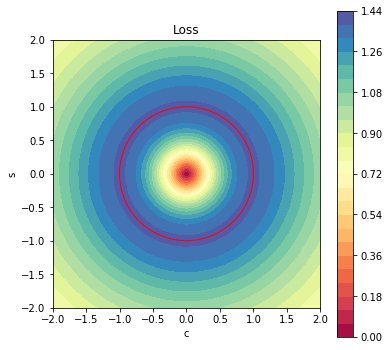

In [4]:
x = np.linspace(clow, chigh, step)
y = np.linspace(slow, shigh, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('c')
ax.set_ylabel('s')
cf = ax.contourf(X,Y,Z,25, cmap='Spectral')
fig.colorbar(cf, ax=ax)
plt.title('Loss')
circ = plt.Circle((0, 0), radius=1, edgecolor='r', facecolor='None')
ax.add_patch(circ)

plt.show()

In [5]:
sigma = [[1, 0],[0, 2]]
N =10 ** 3
generator = np.random.default_rng()
xx = generator.multivariate_normal(mu, sigma, N)
C = 0
S = 0
range = 2
clow = C-range
chigh = C+range
step = 100
slow = S - range
shigh = S + range
alpha = 0
e = 10**-7

mylosses= np.zeros((step, step))
i = 0
for s in np.linspace(slow,shigh,step):
    losses = np.zeros(step)
    j = 0
    for c in np.linspace(clow, chigh, step):
        yy = g(c, s, xx)
        losses[j] = np.mean(-np.log(e+h(c,s, xx)) - np.log(e+1.-h(c, s, yy)))
        j += 1
    mylosses[i] = losses
    i += 1

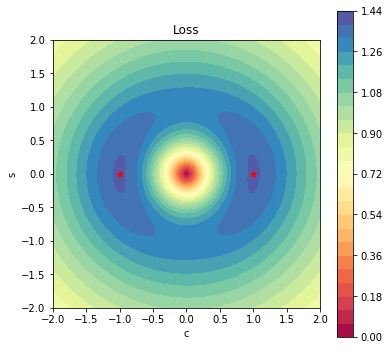

In [7]:
x = np.linspace(clow, chigh, step)
y = np.linspace(slow, shigh, step)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('c')
ax.set_ylabel('s')
cf = ax.contourf(X,Y,Z,25, cmap='Spectral')
fig.colorbar(cf, ax=ax)
plt.title('Loss')
plt.scatter([1, -1], [0, 0], marker='*', c='r')

plt.show()